In [42]:
# from google.colab import drive
# import pandas as pd
# drive.mount('/content/drive')

# import os
# twitter = pd.read_csv("/content/drive/MyDrive/twitter_outer_sentiment(1).csv", encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# len(twitter)

# sentiment_calculated = []

# with open(r'/content/drive/MyDrive/1599kList.txt', 'r') as fp:
#     for line in fp:
#         # remove linebreak from a current name
#         # linebreak is the last character of each line
#         x = line[:-1]

#         # add current item to the list
#         sentiment_calculated.append(int(x))



In [5]:
import numpy as np
import pandas as pd

In [8]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
twitter = pd.read_csv('/Users/michalkielkowski/Desktop/infa-all/magisterka/eksploracja_danych/Twitter_Sentiment_Analysis/data/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING , names=DATASET_COLUMNS)
twitter.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [44]:
twitter.head(5)

,Unnamed: 0,sentiment,date,username,tweet,outer_sentiment
0,0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
1,1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,2
2,2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
3,3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0
4,4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,2


In [45]:
# print(len(twitter))
# print(len(sentiment_calculated))

# twitter.head(5)

In [46]:
# twitter = twitter.drop(twitter.columns[[1,3]], axis=1)
# twitter.columns.values[0] = "sentiment"
# twitter.columns.values[1] = "date"
# twitter.columns.values[2] = "username"
# twitter.columns.values[3] = "tweet"
# twitter['outer_sentiment'] = sentiment_calculated
# twitter.head(5)

In [47]:
# twitter.to_csv('twitter_outer_sentiment.csv')

In [48]:
# removing stopwords

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')
nltk.download('punkt')

stop_words_cached = stopwords.words('english')
tk = TweetTokenizer()


import re
WORD = re.compile(r"")
def regTokenize(text):
    words = WORD.findall(text)
    return words

tokenized_twitter = twitter.copy()
tokenized_twitter.head(5)

tokenized_twitter["tweet"] = tokenized_twitter["tweet"].apply(tk.tokenize)
tokenized_twitter.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,sentiment,date,username,tweet,outer_sentiment
0,0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,"[is, upset, that, he, can't, update, his, Face...",0
1,1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,"[@Kenichan, I, dived, many, times, for, the, b...",2
2,2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,"[my, whole, body, feels, itchy, and, like, its...",0
3,3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"[@nationwideclass, no, ,, it's, not, behaving,...",0
4,4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,"[@Kwesidei, not, the, whole, crew]",2


In [49]:
dict_mentions = {}
dict_positive_mentions = {}
dict_negative_mentions = {}
dict_neutral_mentions = {}

for idx, row in enumerate(tokenized_twitter['tweet']):

  for word in row:
    if word[0] == '@' and word != '@':
      if word in dict_mentions:
        dict_mentions[word] = dict_mentions[word] + 1
      else:
        dict_mentions[word] = 1
      if tokenized_twitter['outer_sentiment'][idx] == 0:
        if word in dict_negative_mentions:
          dict_negative_mentions[word] = dict_negative_mentions[word] + 1
        else:
          dict_negative_mentions[word] = 1
      if tokenized_twitter['outer_sentiment'][idx] == 2:
        if word in dict_neutral_mentions:
         dict_neutral_mentions[word] = dict_neutral_mentions[word] + 1
        else:
          dict_neutral_mentions[word] = 1
      if tokenized_twitter['outer_sentiment'][idx] == 4:
        if word in dict_positive_mentions:
          dict_positive_mentions[word] = dict_positive_mentions[word] + 1
        else:
          dict_positive_mentions[word] = 1

user = []
mentions = []

user_positive = []
positive_mentions = []

user_negative = []
negative_mentions = []

user_neutral = []
neutral_mentions = []

print(positive_mentions)

for key in dict_mentions.keys():
  user.append(key)
  mentions.append(dict_mentions[key])

for key in dict_positive_mentions.keys():
  user_positive.append(key)
  positive_mentions.append(dict_positive_mentions[key])

for key in dict_negative_mentions.keys():
  user_negative.append(key)
  negative_mentions.append(dict_negative_mentions[key])

for key in dict_neutral_mentions.keys():
  user_neutral.append(key)
  neutral_mentions.append(dict_neutral_mentions[key])



[]


In [50]:
print(dict_neutral_mentions.keys())

dict_keys(['@Kenichan', '@Kwesidei', '@Tatiana_K', '@twittera', '@FakerPattyPattz', '@angry_barista', '@alielayus', '@HumpNinja', '@BatManYNG', '@Lt_Algonquin', '@jdarter', '@ashleyac', '@markhardy1974', '@msdrama', '@Hollywoodheat', '@makeherfamous', '@kpreyes', '@paradisej', '@marykatherine_q', '@mrsaintnick', '@twista202', '@jonathanchard', '@pinkserendipity', '@eloquentembrace', '@mandayyy', '@David_Henrie', '@MyConnecticut', '@miss_om', '@SarahReedSC', '@jemcam', '@mathewsmichael', '@DiannePulham', '@bostongarden', '@ITS_NEMESIS', '@zaydia', '@ThaStevieG', '@kariajay', '@karenucol', '@FranzGlaus', '@SaveTheStrib', '@thecoolestout', '@trishzw', '@a5hleyf', '@amber_benson', '@Jeffree_Star', '@otakusecret', '@ScoutBuck', '@nchokkan', '@Poohpot', '@MTUB', '@Steve_Buscemi', '@danadearmond', '@johnnybeane', '@hummiemd', '@OfficialRandL', '@RandomlyNat', '@SupaMagg', '@treesahquiche', '@jillianfish', '@anistorm', '@sleep_til_noon', '@ddlovato', '@nomadicmatt', '@Appomattox_News', '@jeffr

In [51]:
mentions2, user2 = (list(t) for t in zip(*sorted(zip(mentions, user), reverse=True)))

positive_mentions2, user_positive2 = (list(t) for t in zip(*sorted(zip(positive_mentions, user_positive), reverse=True)))

negative_mentions2, user_negative2 = (list(t) for t in zip(*sorted(zip(negative_mentions, user_negative), reverse=True)))

neutral_mentions2, user_neutral2 = (list(t) for t in zip(*sorted(zip(neutral_mentions, user_neutral), reverse=True)))


In [52]:
print(user2[:50])
print(mentions2[:10])

print(user_positive2[:50])
print(positive_mentions2[:10])

print(user_negative2[:50])
print(negative_mentions2[:10])

print(user_neutral2[:50])
print(neutral_mentions2[:10])

['@mileycyrus', '@tommcfly', '@ddlovato', '@DavidArchie', '@Jonasbrothers', '@jordanknight', '@DonnieWahlberg', '@mitchelmusso', '@JonathanRKnight', '@taylorswift13', '@jonasbrothers', '@selenagomez', '@dougiemcfly', '@peterfacinelli', '@aplusk', '@joeymcintyre', '@Dannymcfly', '@gfalcone601', '@shaundiviney', '@YoungQ', '@kirstiealley', '@TomFelton', '@stephenfry', '@iamdiddy', '@officialTila', '@lilyroseallen', '@ashleytisdale', '@johncmayer', '@AlexAllTimeLow', '@dannywood', '@PerezHilton', '@Pink', '@souljaboytellem', '@andyclemmensen', '@dannygokey', '@markhoppus', '@petewentz', '@TheRealJordin', '@KimKardashian', '@Wossy', '@trent_reznor', '@Alyssa_Milano', '@yelyahwilliams', '@MariahCarey', '@bradiewebbstack', '@katyperry', '@LaurenConrad', '@backstreetboys', '@billyraycyrus', '@nick_carter']
[4500, 3887, 3466, 1299, 1287, 1129, 1104, 1077, 1074, 1011]
['@mileycyrus', '@tommcfly', '@ddlovato', '@Jonasbrothers', '@DavidArchie', '@taylorswift13', '@jonasbrothers', '@mitchelmusso',

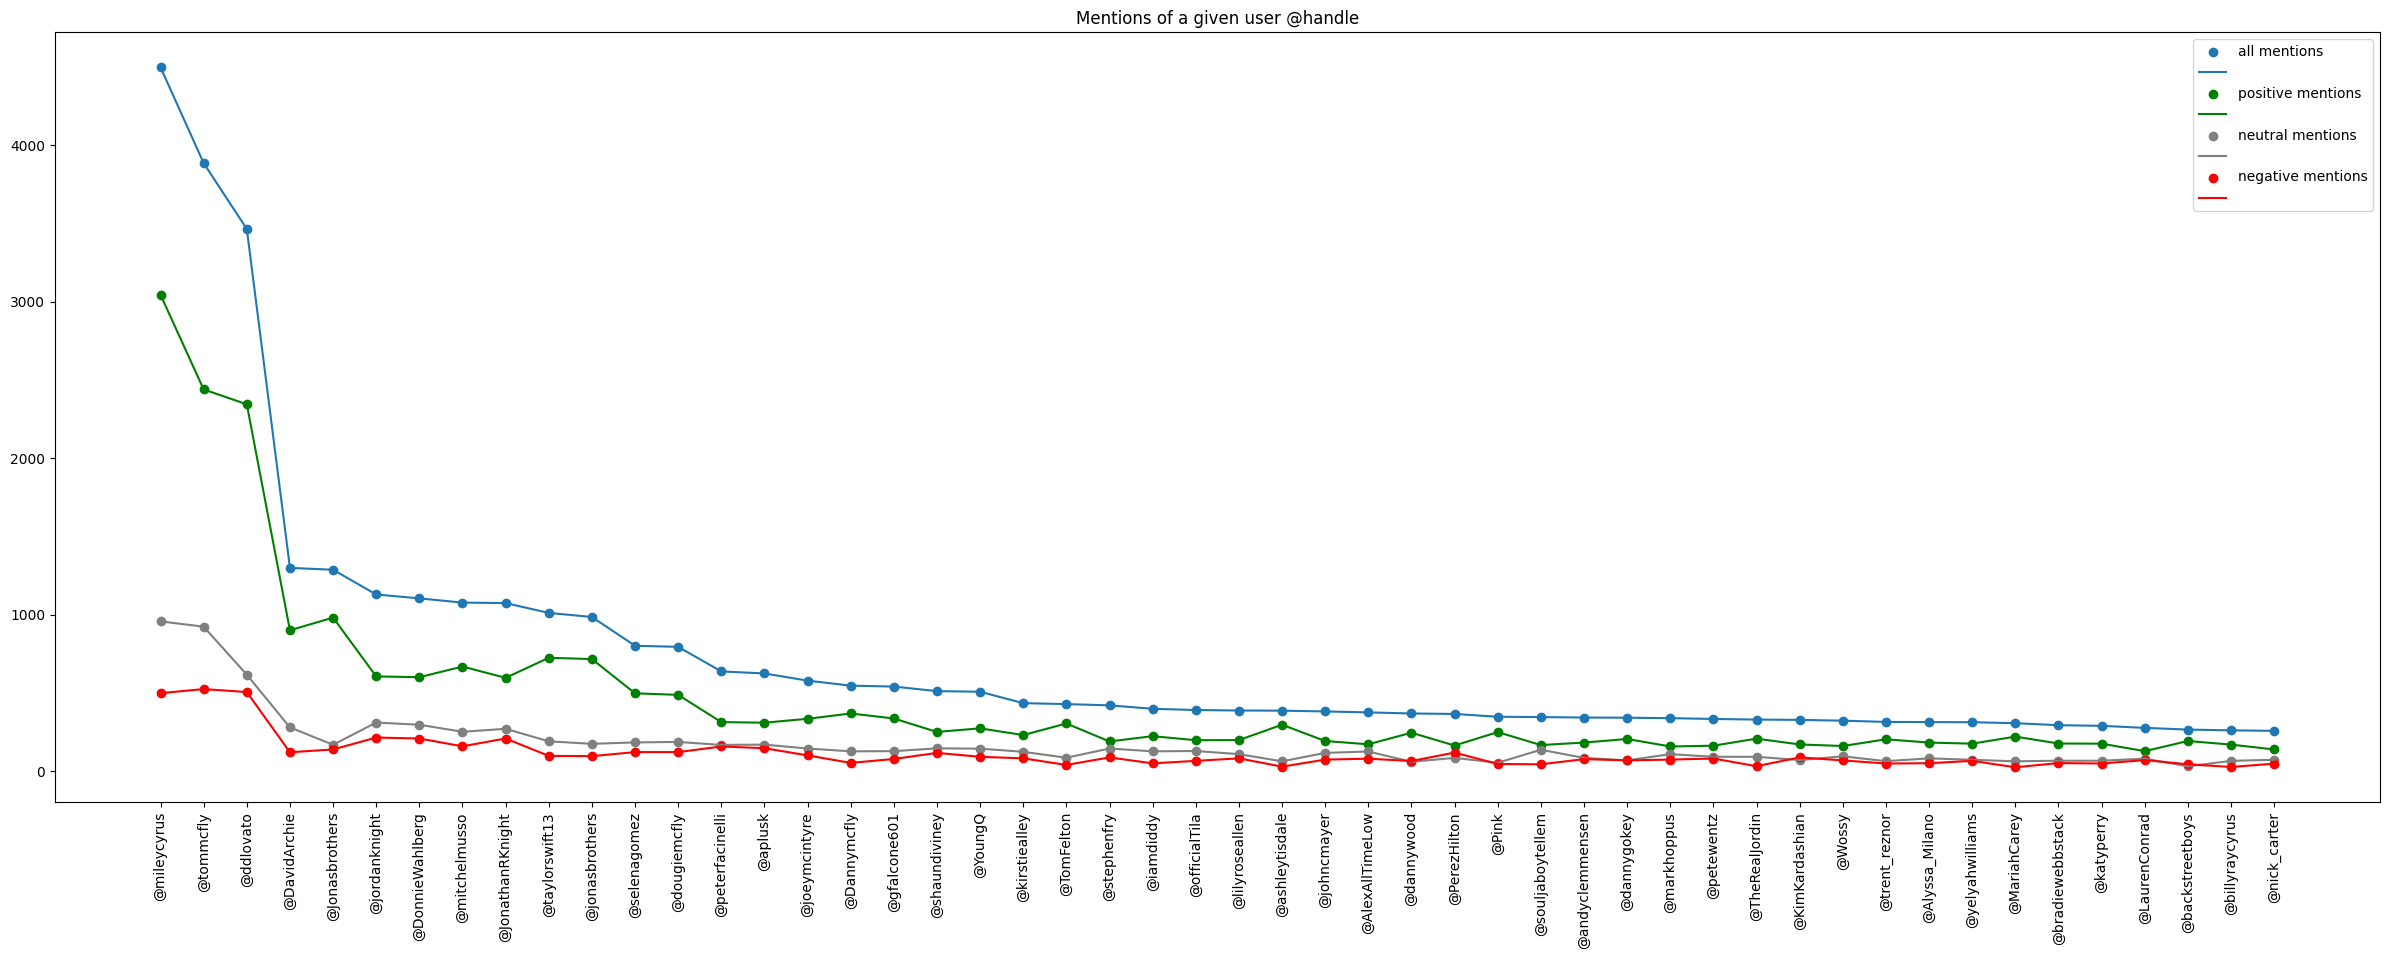

In [53]:
import matplotlib.pyplot as plt
import numpy as np


positive_data = []
neutral_data = []
negative_data = []

for user in user2[:50]:
  positive_data.append(dict_positive_mentions.get(user, 0))
  neutral_data.append(dict_neutral_mentions.get(user, 0))
  negative_data.append(dict_negative_mentions.get(user, 0))

plt.figure(figsize=(30,10))
plt.title("Mentions of a given user @handle")
plt.xticks(rotation=90)
plt.scatter(user2[:50], mentions2[:50])
plt.plot(user2[:50], mentions2[:50])

for plot in [[positive_data, "green"], [neutral_data, "grey"], [negative_data, "red"]]:
  plt.scatter(user2[:50], plot[0], color=plot[1])
  plt.plot(user2[:50], plot[0], color=plot[1])



plt.legend(['all mentions', None, 'positive mentions', None, 'neutral mentions', None, 'negative mentions', None])

plt.show()

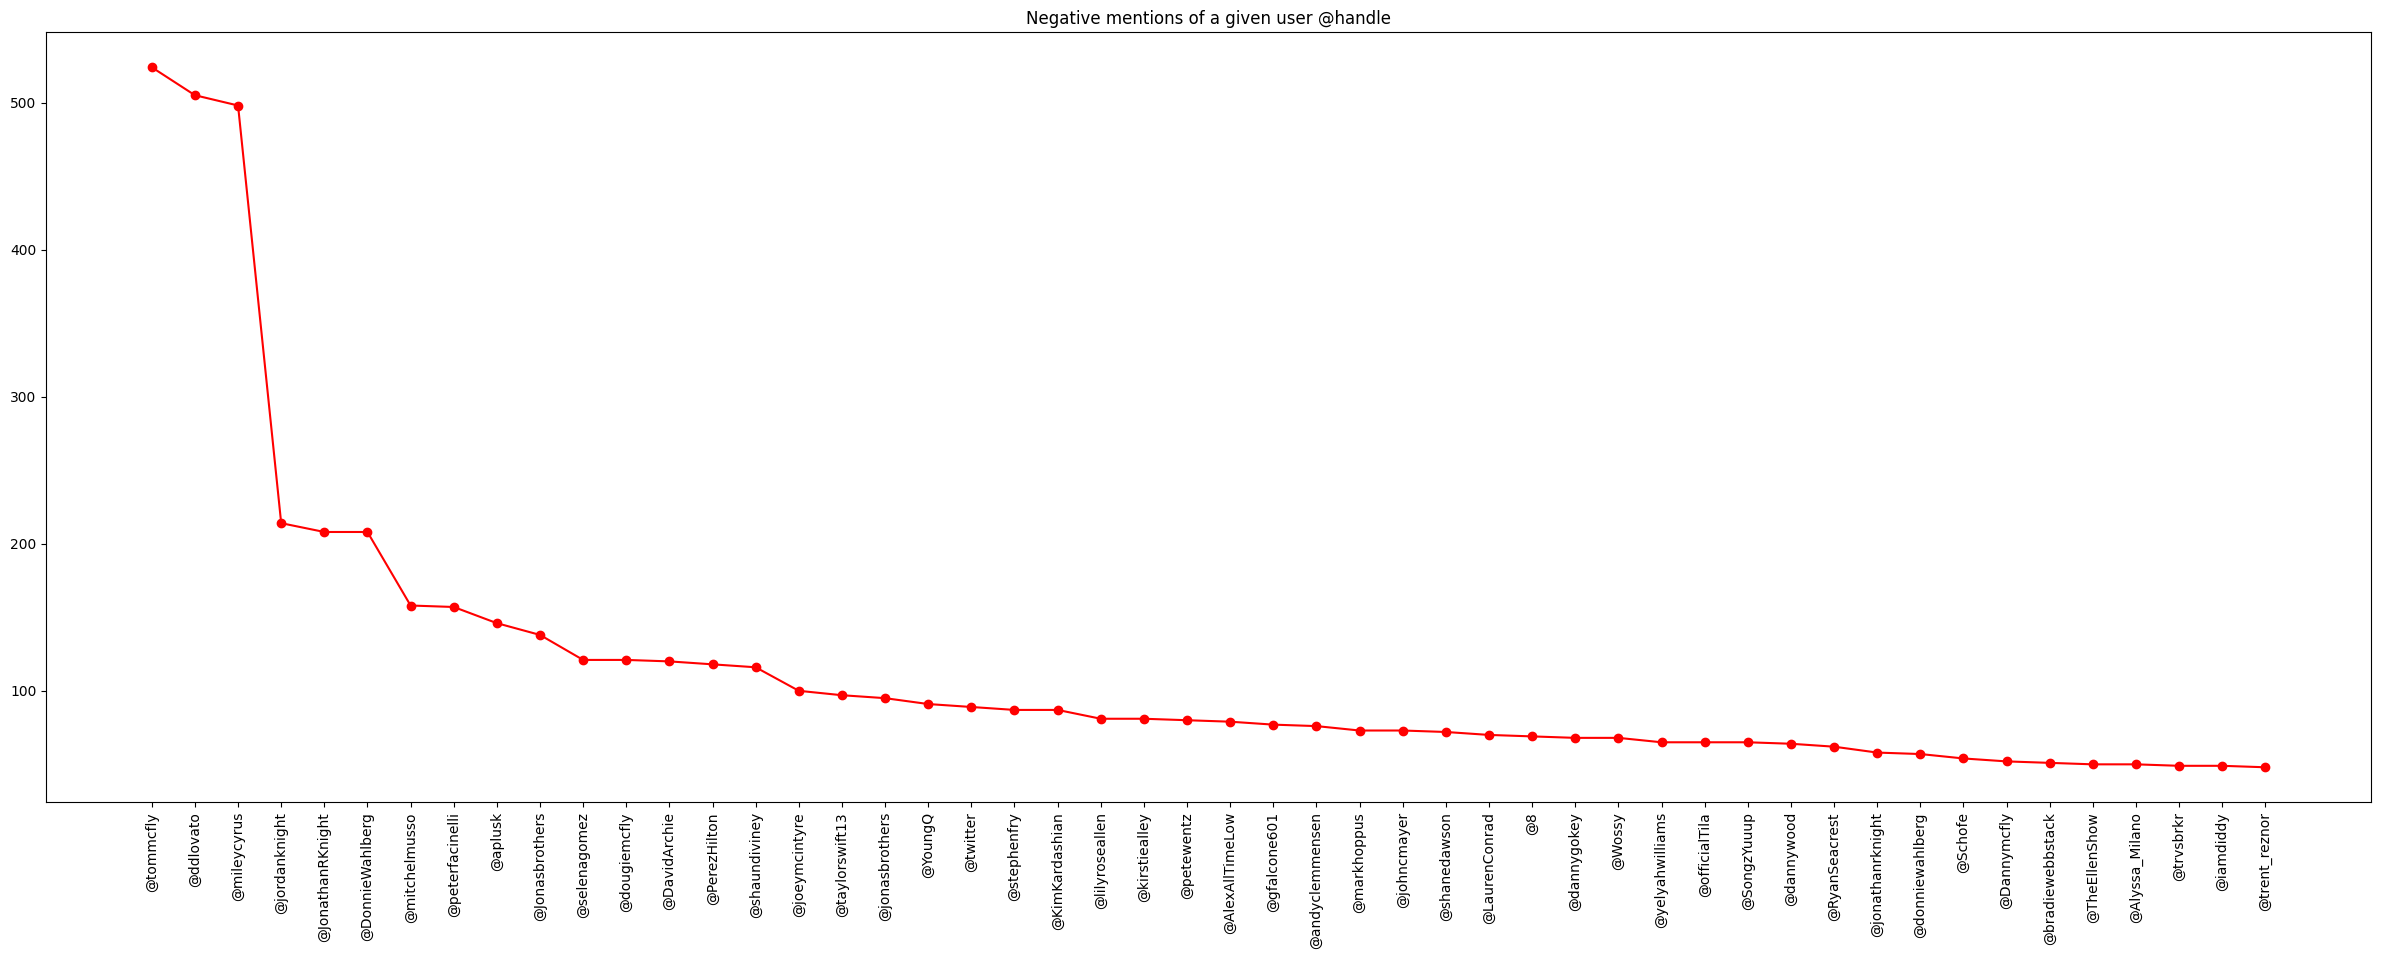

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(30,10))
plt.title("Negative mentions of a given user @handle")
plt.xticks(rotation=90)
plt.scatter(user_negative2[:50], negative_mentions2[:50], color="red")
plt.plot(user_negative2[:50], negative_mentions2[:50], color="red")

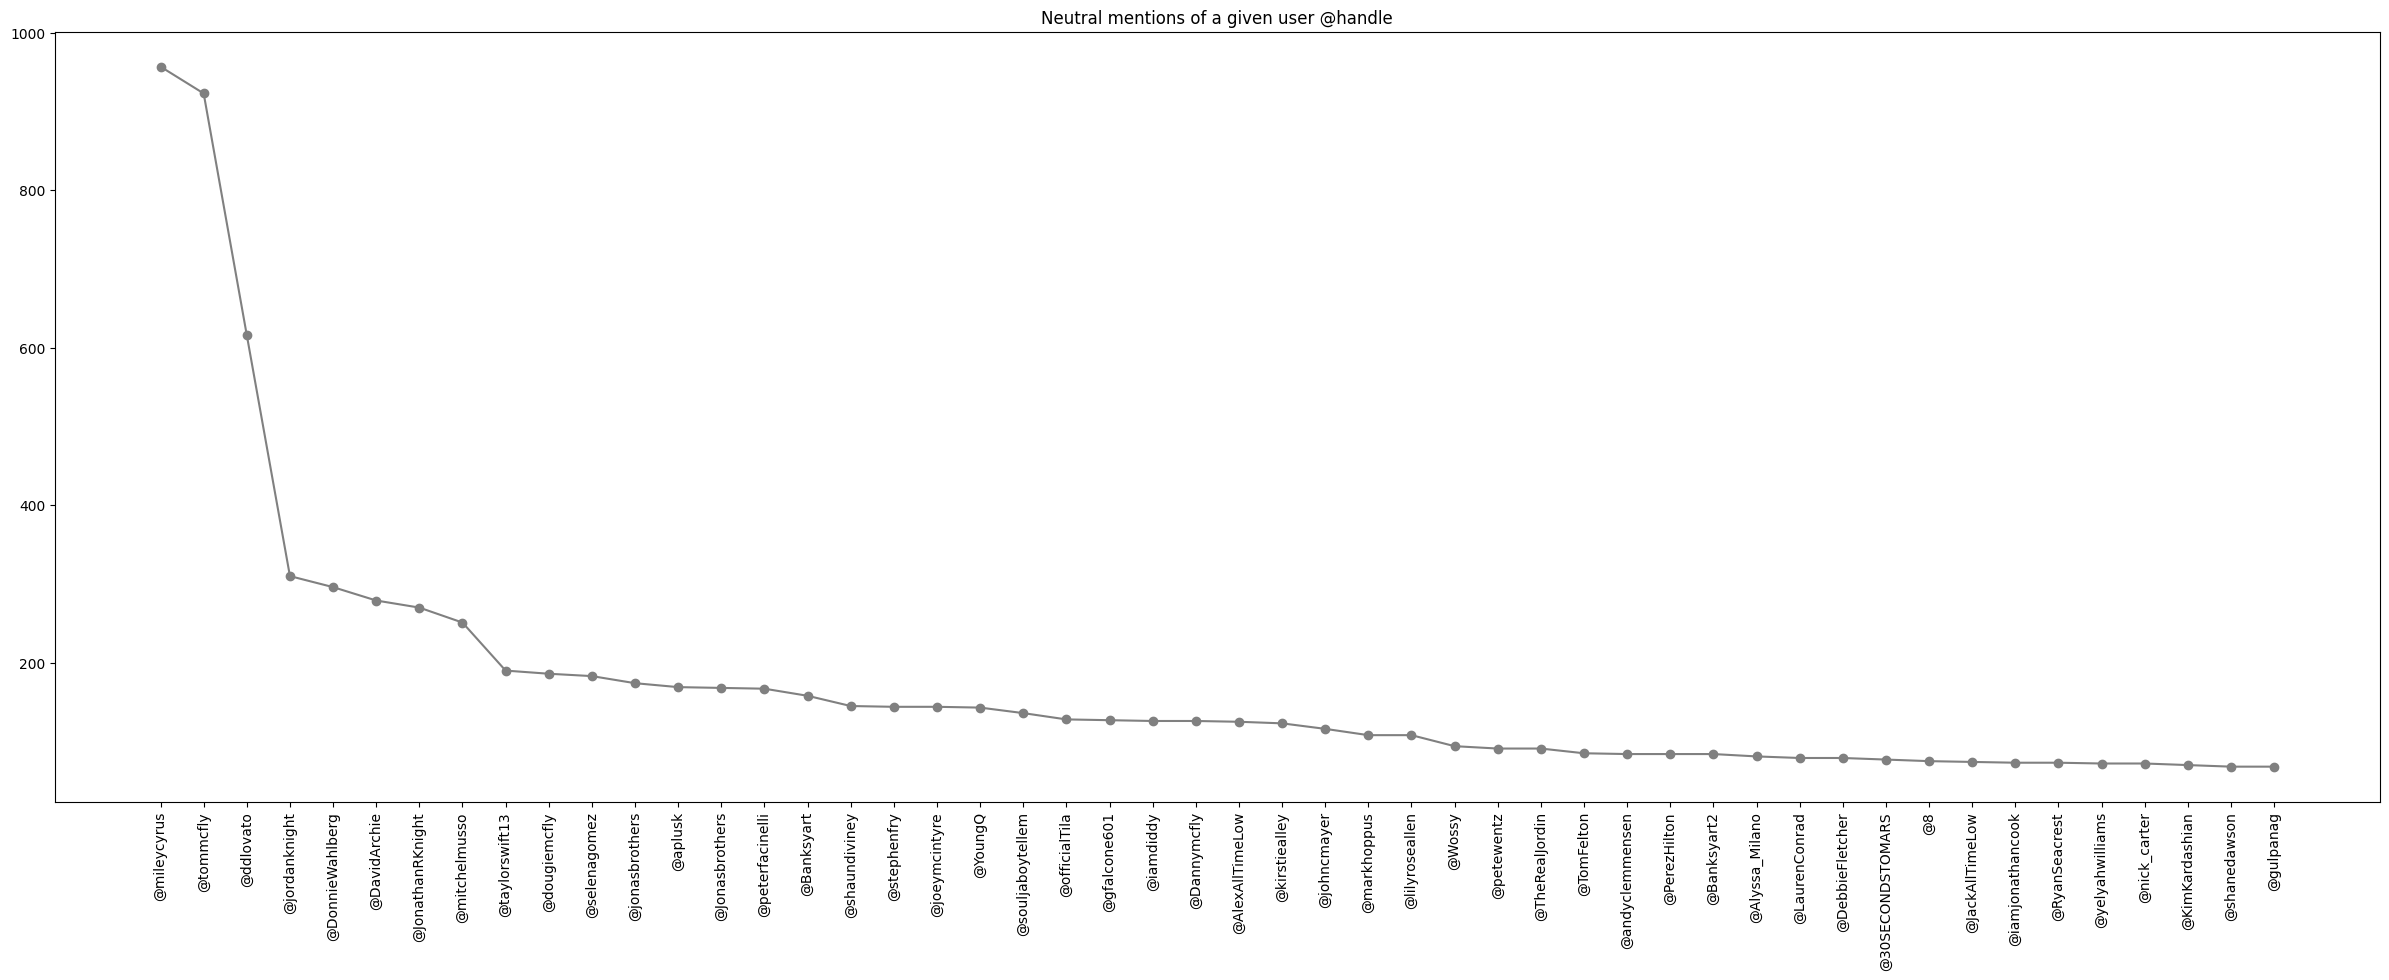

In [55]:
plt.figure(figsize=(30,10))
plt.title("Neutral mentions of a given user @handle")
plt.xticks(rotation=90)
plt.scatter(user_neutral2[:50], neutral_mentions2[:50], color="grey")
plt.plot(user_neutral2[:50], neutral_mentions2[:50], color="grey")

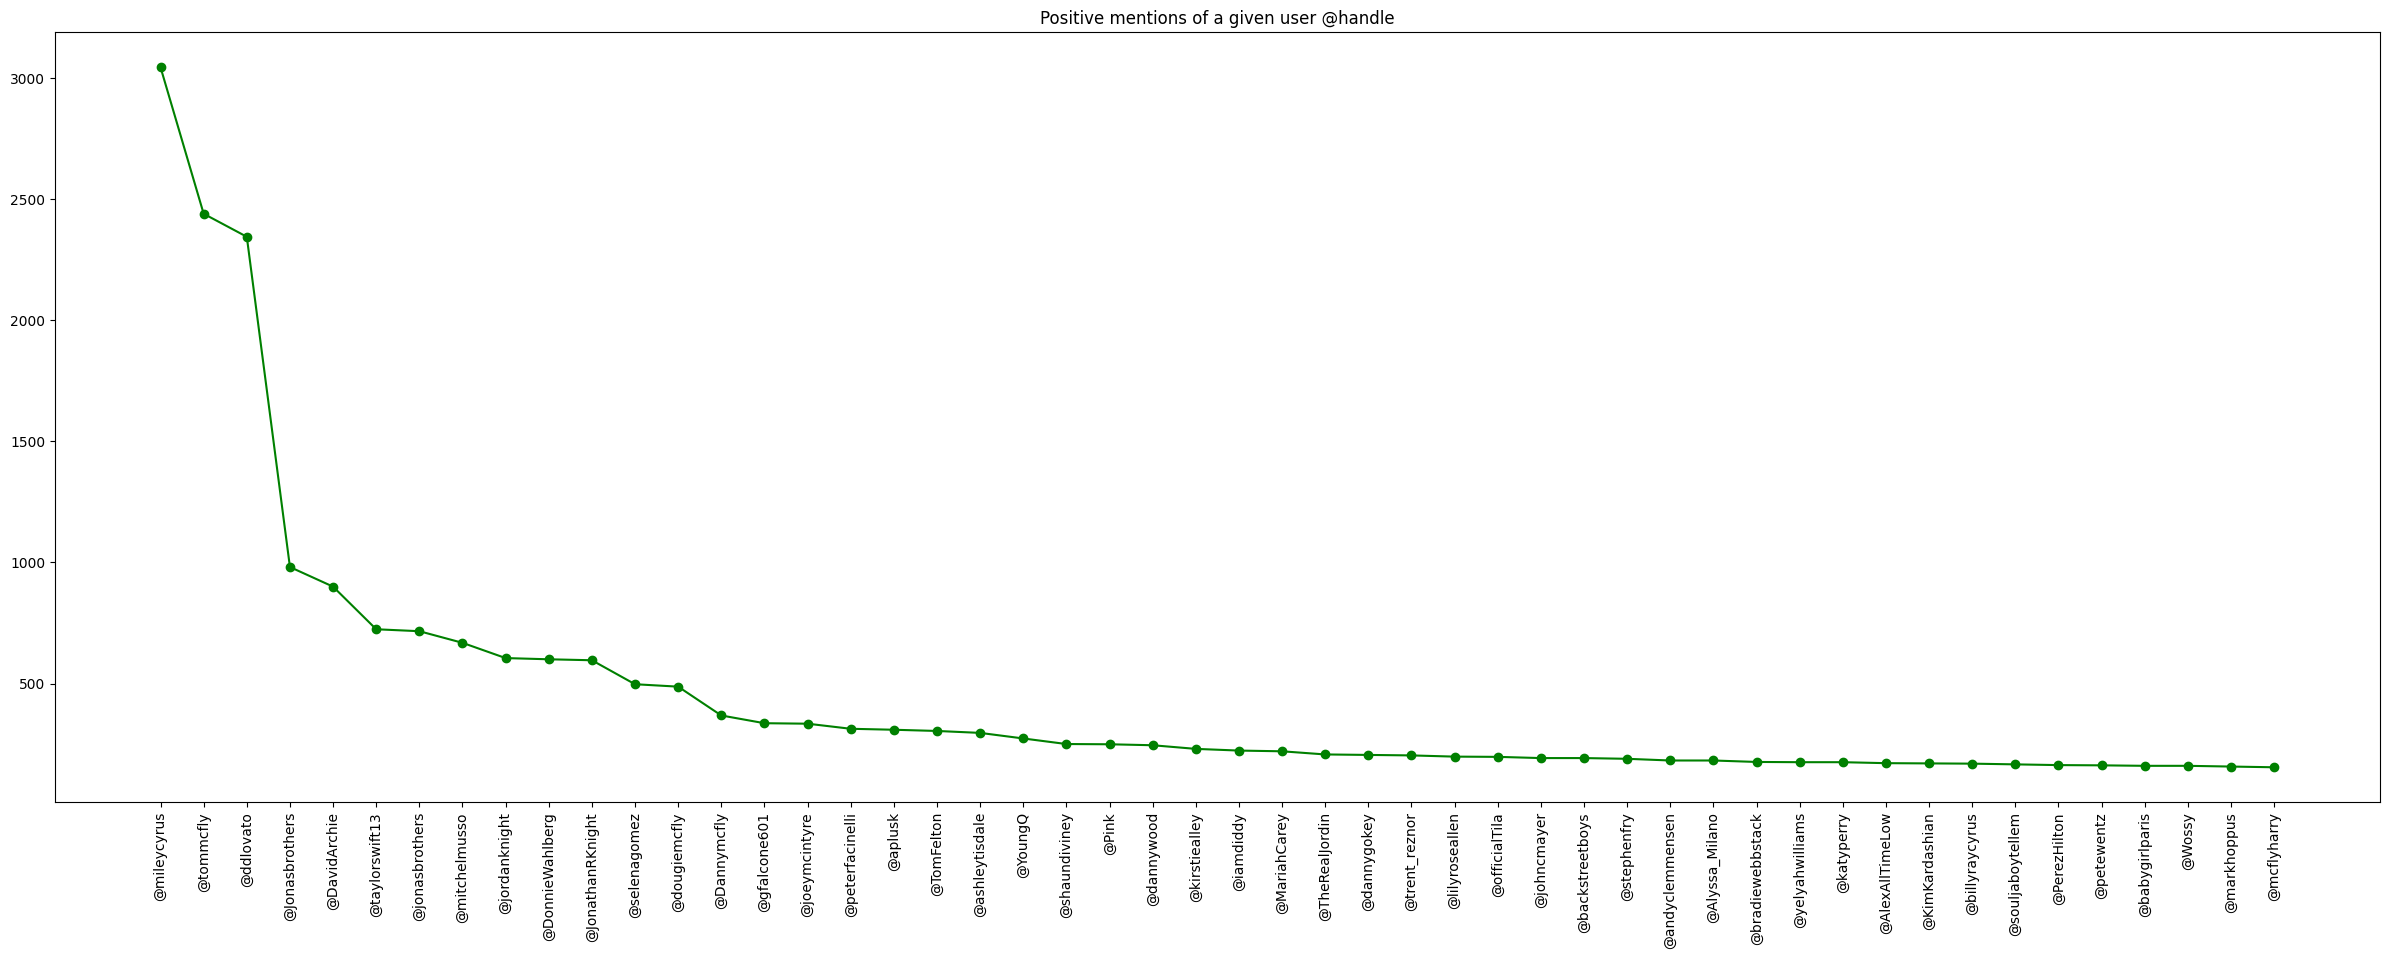

In [56]:
plt.figure(figsize=(30,10))
plt.title("Positive mentions of a given user @handle")
plt.xticks(rotation=90)
plt.scatter(user_positive2[:50], positive_mentions2[:50], color="green")
plt.plot(user_positive2[:50], positive_mentions2[:50], color="green")

In [57]:
# most tweeting people

dict_tweets = {}
dict_positive_tweets = {}
dict_negative_tweets = {}
dict_neutral_tweets = {}

tweets_with_user = zip(twitter['username'], twitter['outer_sentiment'])

for user, sentiment in tweets_with_user:
  if user in dict_tweets:
    dict_tweets[user] += 1
  else:
    dict_tweets[user] = 1

  if user in dict_positive_tweets and sentiment == 4:
    dict_positive_tweets[user] += 1
  else:
    dict_positive_tweets[user] = 1

  if user in dict_neutral_tweets and sentiment == 2:
    dict_neutral_tweets[user] += 1
  else:
    dict_neutral_tweets[user] = 1

  if user in dict_negative_tweets and sentiment == 0:
    dict_negative_tweets[user] += 1
  else:
    dict_negative_tweets[user] = 1


user = []
tweets = []

user_positive = []
positive_tweets = []

user_negative = []
negative_tweets = []

user_neutral = []
neutral_tweets = []

for key in dict_tweets.keys():
  user.append(key)
  tweets.append(dict_tweets[key])

for key in dict_positive_tweets.keys():
  user_positive.append(key)
  positive_tweets.append(dict_positive_tweets[key])

for key in dict_negative_tweets.keys():
  user_negative.append(key)
  negative_tweets.append(dict_negative_tweets[key])

for key in dict_neutral_tweets.keys():
  user_neutral.append(key)
  neutral_tweets.append(dict_neutral_tweets[key])

In [58]:
tweets2, user2 = (list(t) for t in zip(*sorted(zip(tweets, user), reverse=True)))

positive_tweets2, user_positive_tweets2 = (list(t) for t in zip(*sorted(zip(positive_tweets, user_positive), reverse=True)))

negative_tweets2, user_negative_tweets2 = (list(t) for t in zip(*sorted(zip(negative_tweets, user_negative), reverse=True)))

neutral_tweets2, user_neutral_tweets2 = (list(t) for t in zip(*sorted(zip(neutral_tweets, user_neutral), reverse=True)))


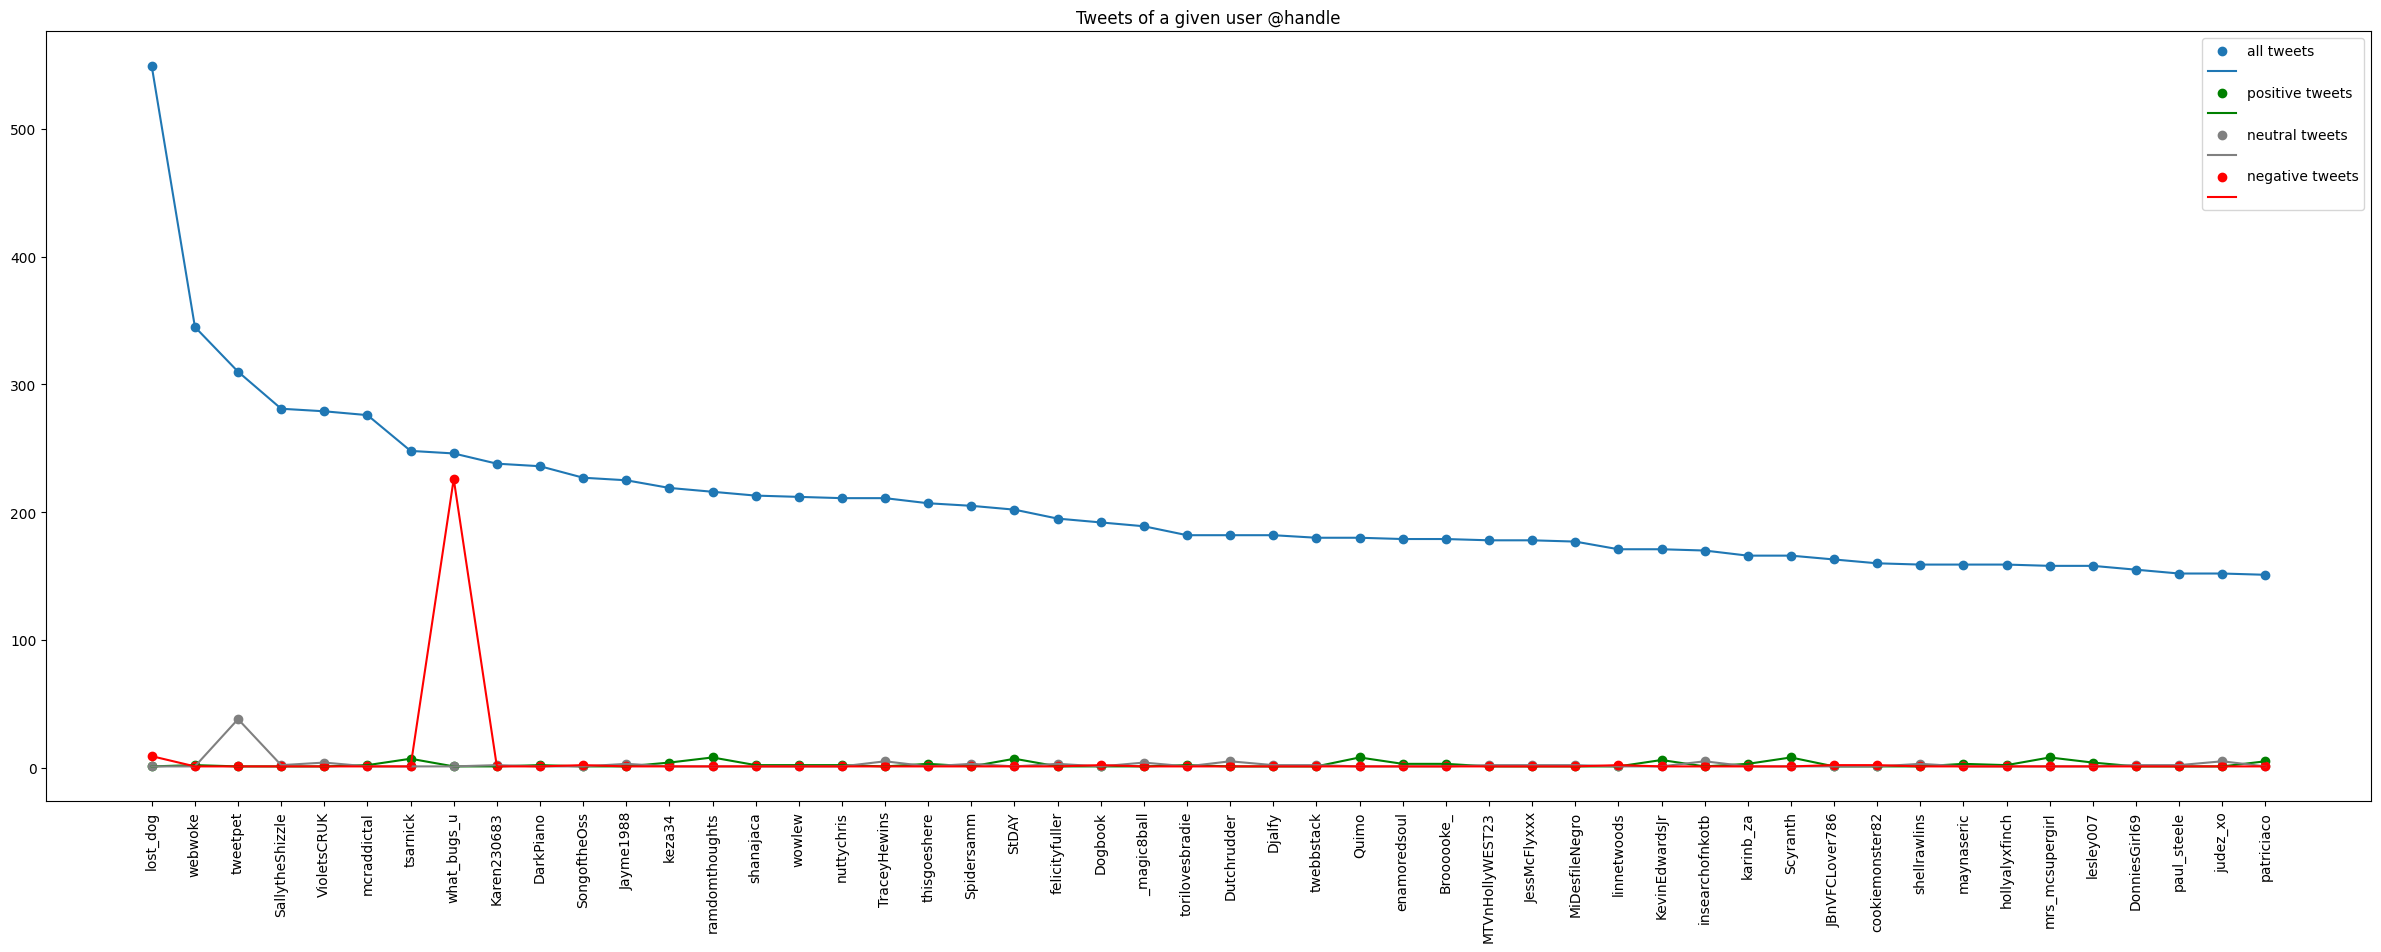

In [59]:
import matplotlib.pyplot as plt
import numpy as np


positive_data = []
neutral_data = []
negative_data = []

for user in user2[:50]:
  positive_data.append(dict_positive_tweets.get(user, 0))
  neutral_data.append(dict_neutral_tweets.get(user, 0))
  negative_data.append(dict_negative_tweets.get(user, 0))

plt.figure(figsize=(30,10))
plt.title("Tweets of a given user @handle")
plt.xticks(rotation=90)
plt.scatter(user2[:50], tweets2[:50])
plt.plot(user2[:50], tweets2[:50])

for plot in [[positive_data, "green"], [neutral_data, "grey"], [negative_data, "red"]]:
  plt.scatter(user2[:50], plot[0], color=plot[1])
  plt.plot(user2[:50], plot[0], color=plot[1])

plt.legend(['all tweets', None, 'positive tweets', None, 'neutral tweets', None, 'negative tweets', None])
plt.show()


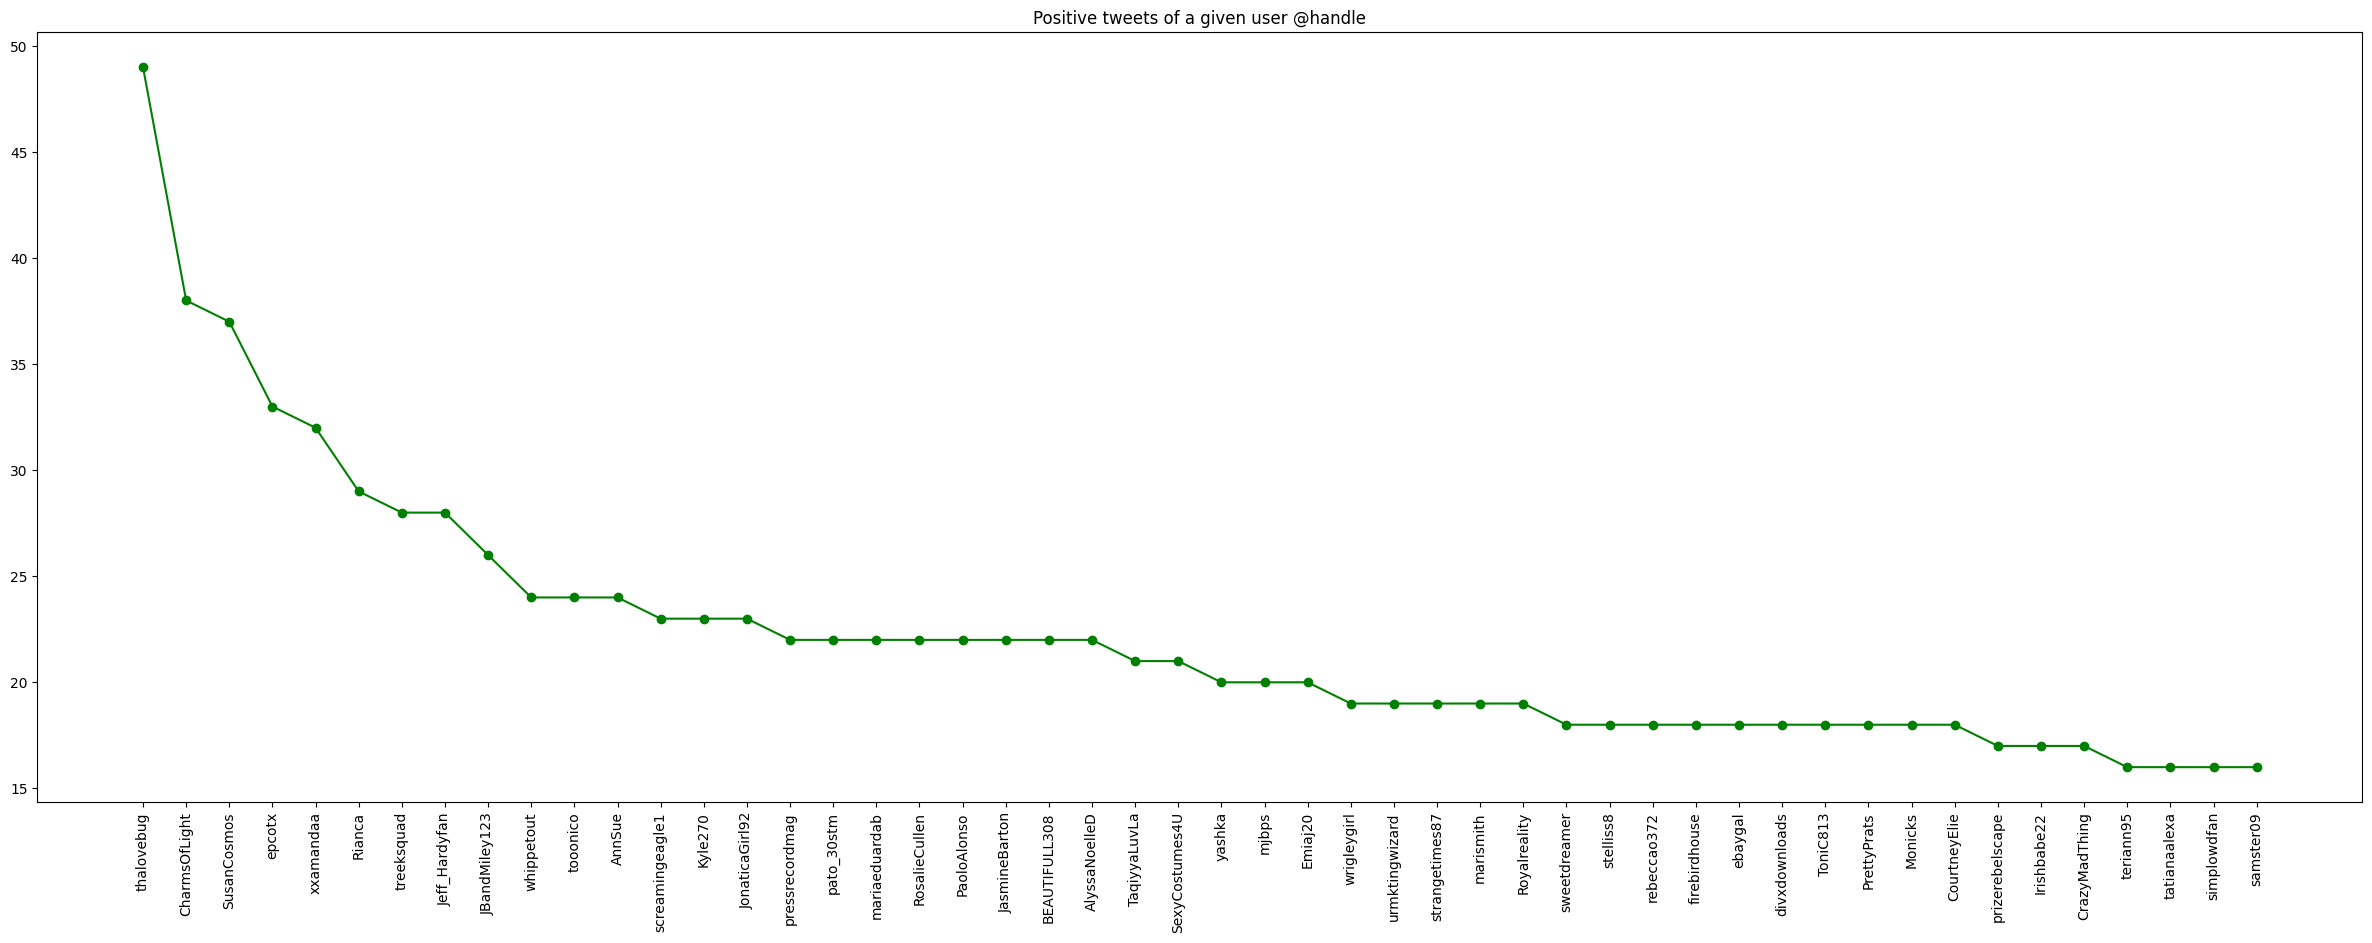

In [60]:
plt.figure(figsize=(30,10))
plt.title("Positive tweets of a given user @handle")
plt.xticks(rotation=90)
plt.scatter(user_positive_tweets2[:50], positive_tweets2[:50], color="green")
plt.plot(user_positive_tweets2[:50], positive_tweets2[:50], color="green")
plt.show()

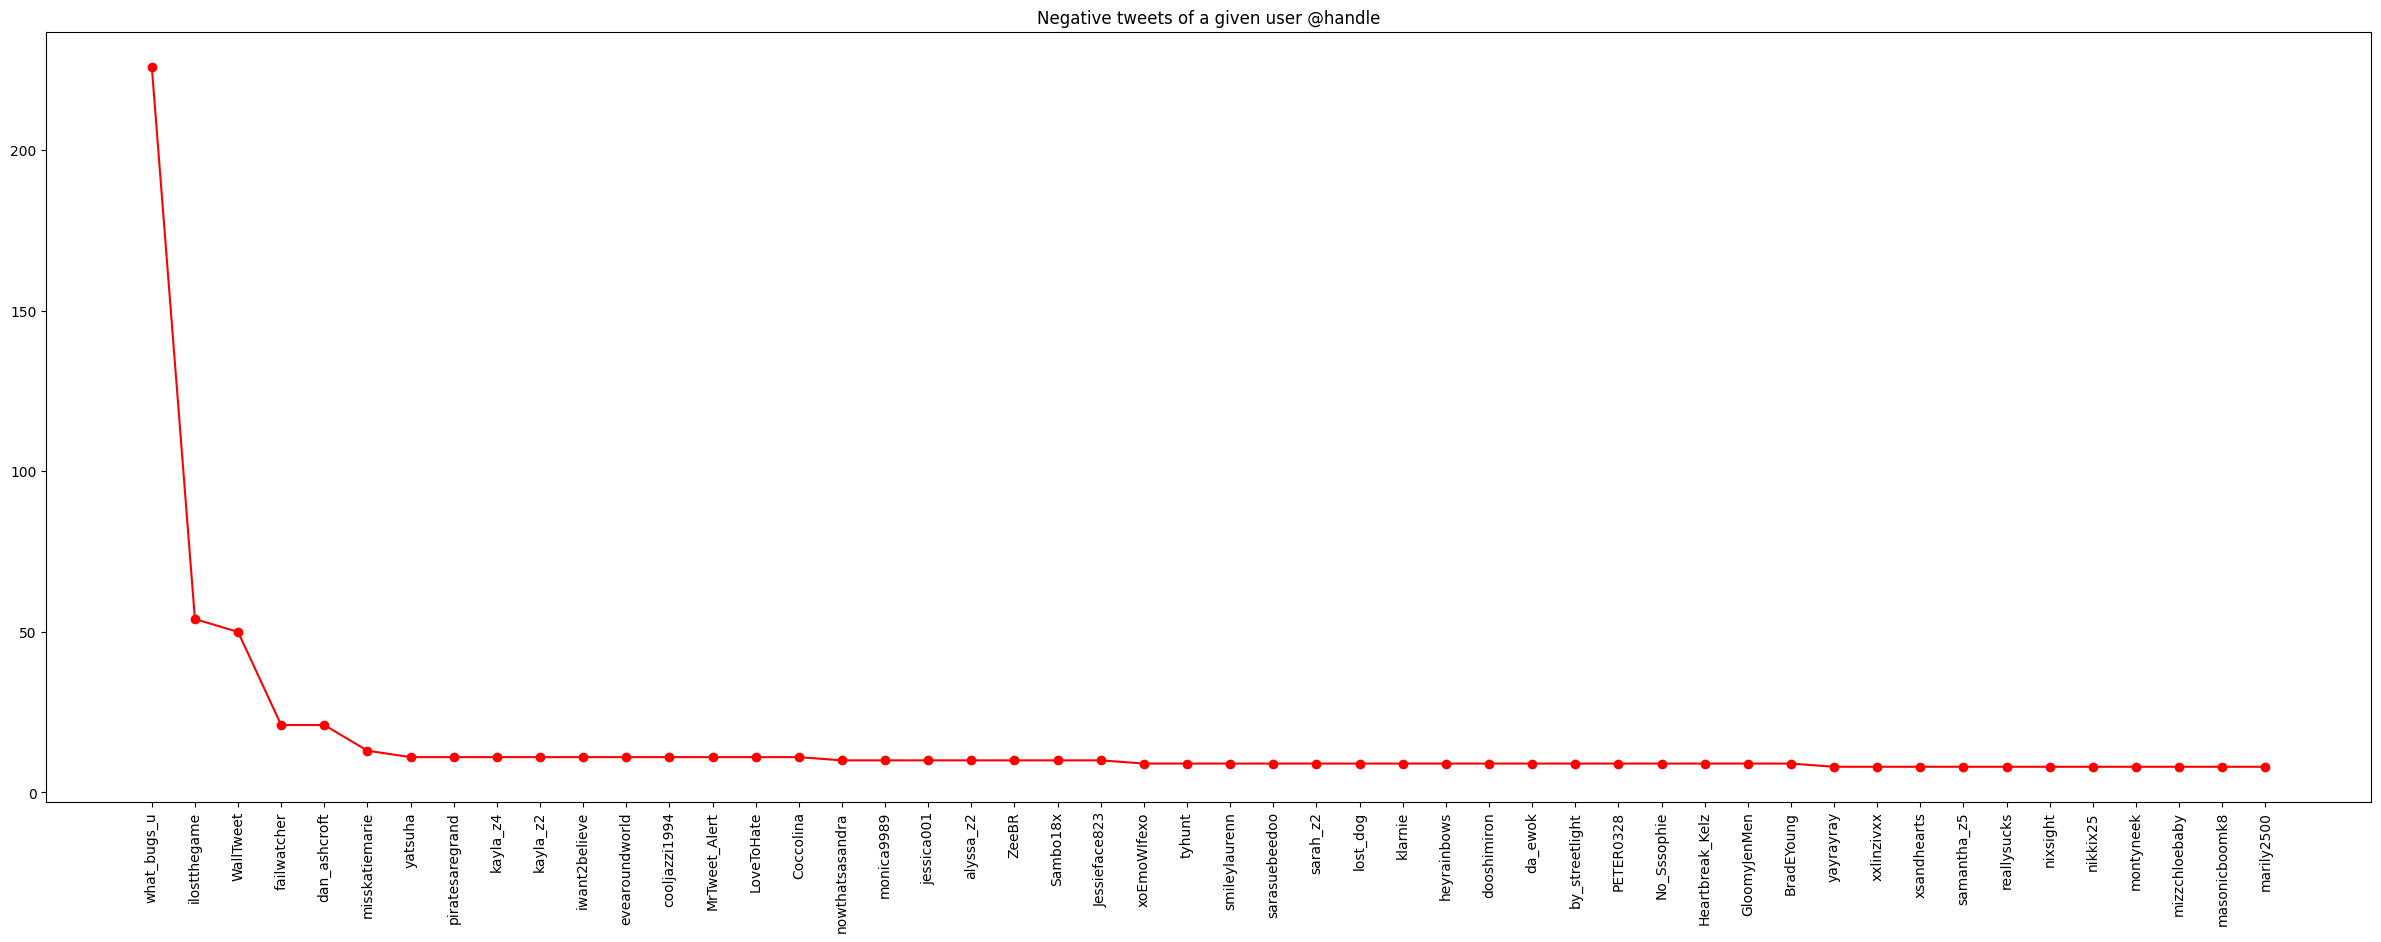

In [61]:
plt.figure(figsize=(30,10))
plt.title("Negative tweets of a given user @handle")
plt.xticks(rotation=90)
plt.scatter(user_negative_tweets2[:50], negative_tweets2[:50], color="red")
plt.plot(user_negative_tweets2[:50], negative_tweets2[:50], color="red")
plt.show()

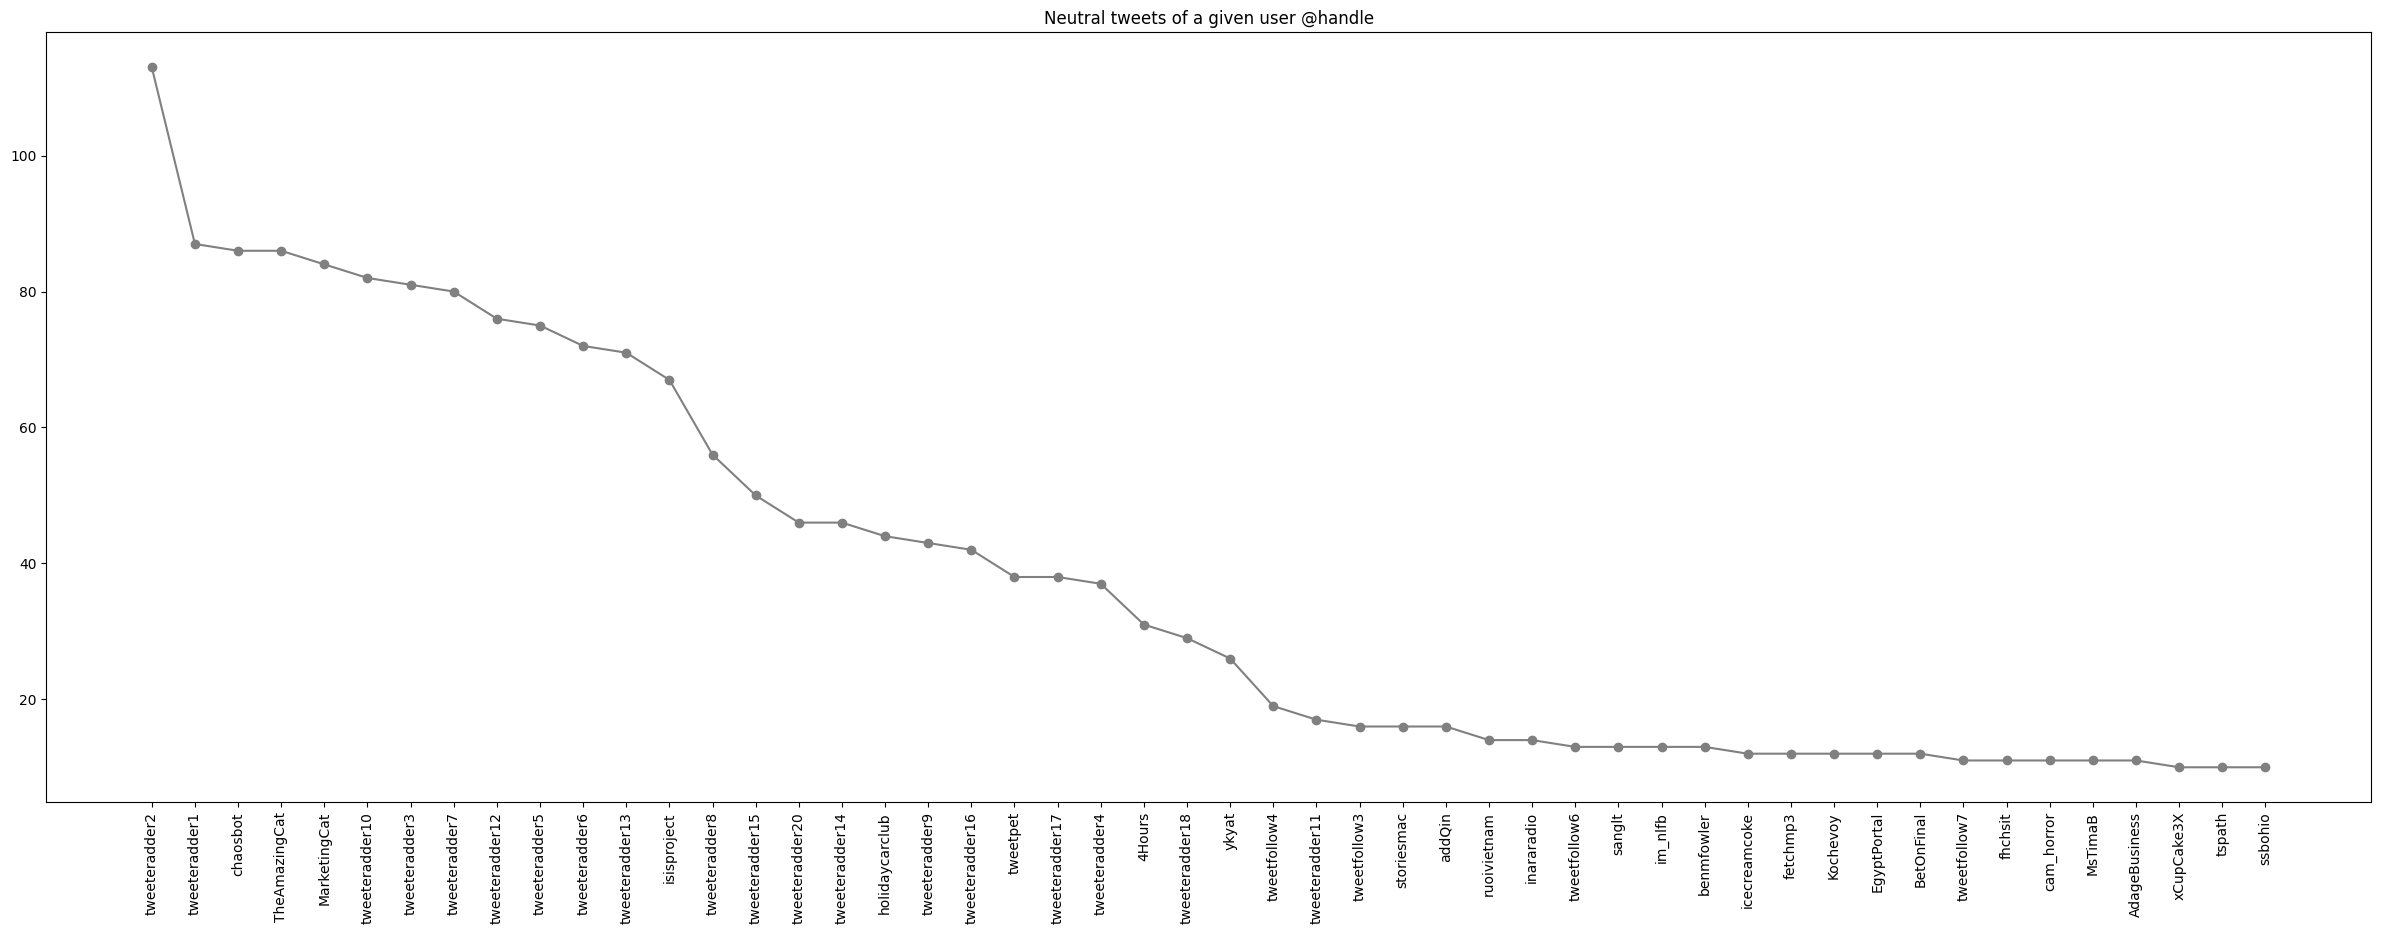

In [62]:
plt.figure(figsize=(30,10))
plt.title("Neutral tweets of a given user @handle")
plt.xticks(rotation=90)
plt.scatter(user_neutral_tweets2[:50], neutral_tweets2[:50], color="grey")
plt.plot(user_neutral_tweets2[:50], neutral_tweets2[:50], color="grey")
plt.show()